# Assignment 3: Census Exploration
_By Tracey Beltran_
 
In this assignment I will be exploring a data set I downloaded from Census Reporter. Here is the ([link to the data set](https://censusreporter.org/data/table/?table=B17005&geo_ids=140|16000US0644000&primary_geo_id=16000US0644000#valueType|percentage)) for reference.

***- About the Data***
><p>The data downloaded for this exploration is on the Poverty Status in the Past 12 Months of Individuals by Sex by Employment Status*. This data will give me a picture of unemployment and employment rates pre-COVID 19, with the hope is to get a better understanding of what poverty looked like before the pandemic. I'm interested to see what census tracts within the County of Los Angeles were already experiencing high poverty and unemployment rates. These areas can benefit from further exploration by looking at other variables like education, household makeup, or industry they worked, to help provide a picture of the disparities within the community. I would also be interested to see the census tracts also have sectors that were impacted by covid-19. The data set, labeled census_poverty, breaks down the data by sex- Income in the past 12 months below and above the poverty level. ![image.png](attachment:image.png)<p>

## Import libraries, maps, and data
   In the lines below I import geopandas and maps that will help observe what's going on with the data.

In [9]:
import geopandas as gpd

In [10]:
import fiona

In [11]:
import folium

In [12]:
census_poverty = gpd.read_file('Data/acs2019_5yr_B17005_14000US06037185320.shp')

## Exploring the data
   In the lines below, I will look at the data. I first want to make sure that I downloaded the data correctly. I then run a code to see the first five lines of the data. Here I know what was downloaded. At first, I have no idea what this means or what data is here. After looking at the metadata, I noticed that the information is the people surveyed and the standard deviation of every response. Since the table doesn't provide all columns, I run the list to see how many columns are in the data. 

In [13]:
type(census_poverty)

geopandas.geodataframe.GeoDataFrame

In [14]:
census_poverty.head (5)

,geoid,name,B17005001,B17005001e,B17005002,B17005002e,B17005003,B17005003e,B17005004,B17005004e,...,B17005019e,B17005020,B17005020e,B17005021,B17005021e,B17005022,B17005022e,B17005023,B17005023e,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3451.0,380.0,474.0,244.0,252.0,164.0,93.0,67.0,...,198.0,1031.0,153.0,981.0,143.0,50.0,40.0,548.0,156.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2983.0,241.0,119.0,66.0,40.0,34.0,22.0,28.0,...,201.0,910.0,126.0,880.0,125.0,30.0,28.0,520.0,148.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",5006.0,436.0,1070.0,336.0,457.0,193.0,170.0,97.0,...,276.0,1206.0,241.0,1169.0,235.0,37.0,51.0,547.0,175.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3064.0,237.0,462.0,167.0,237.0,122.0,140.0,78.0,...,168.0,866.0,143.0,822.0,142.0,44.0,33.0,526.0,123.0,"POLYGON ((-118.28592 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3425.0,361.0,210.0,119.0,122.0,70.0,34.0,44.0,...,237.0,930.0,146.0,906.0,143.0,24.0,23.0,810.0,185.0,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [15]:
list (census_poverty)

['geoid',
 'name',
 'B17005001',
 'B17005001e',
 'B17005002',
 'B17005002e',
 'B17005003',
 'B17005003e',
 'B17005004',
 'B17005004e',
 'B17005005',
 'B17005005e',
 'B17005006',
 'B17005006e',
 'B17005007',
 'B17005007e',
 'B17005008',
 'B17005008e',
 'B17005009',
 'B17005009e',
 'B17005010',
 'B17005010e',
 'B17005011',
 'B17005011e',
 'B17005012',
 'B17005012e',
 'B17005013',
 'B17005013e',
 'B17005014',
 'B17005014e',
 'B17005015',
 'B17005015e',
 'B17005016',
 'B17005016e',
 'B17005017',
 'B17005017e',
 'B17005018',
 'B17005018e',
 'B17005019',
 'B17005019e',
 'B17005020',
 'B17005020e',
 'B17005021',
 'B17005021e',
 'B17005022',
 'B17005022e',
 'B17005023',
 'B17005023e',
 'geometry']

## Editing the column names

    Once I can tell how many columns contain relevant data, I run the code to keep the data I want to work with for this assignment. Making sure that the columns are correct, I then replace the column names with the names on the metadata. 
    
    After I complete changing the names, I plot a map to make sure that the geography data is correct. 
    
***I get a map of Los Angeles!***

![Celebrate](celebrate.png)


In [16]:
columns_to_keep = ['geoid', 
                   'name', 
'B17005002', 
'B17005003', 
'B17005004', 
'B17005005', 
'B17005006', 
'B17005007', 
'B17005008', 
'B17005009', 
'B17005010', 
'B17005011', 
'B17005012', 
'B17005013', 
'B17005014', 
'B17005015', 
'B17005016', 
'B17005017', 
'B17005018', 
'B17005019', 
'B17005020', 
'B17005021', 
'B17005022', 
'B17005023', 
'geometry']

In [17]:
census_poverty = census_poverty[columns_to_keep]

In [18]:
census_poverty.head ()

,geoid,name,B17005002,B17005003,B17005004,B17005005,B17005006,B17005007,B17005008,B17005009,...,B17005015,B17005016,B17005017,B17005018,B17005019,B17005020,B17005021,B17005022,B17005023,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",474.0,252.0,93.0,82.0,11.0,159.0,222.0,52.0,...,1050.0,990.0,60.0,348.0,1579.0,1031.0,981.0,50.0,548.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",119.0,40.0,22.0,10.0,12.0,18.0,79.0,0.0,...,1064.0,998.0,66.0,370.0,1430.0,910.0,880.0,30.0,520.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",1070.0,457.0,170.0,129.0,41.0,287.0,613.0,333.0,...,1708.0,1664.0,44.0,475.0,1753.0,1206.0,1169.0,37.0,547.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",462.0,237.0,140.0,90.0,50.0,97.0,225.0,55.0,...,773.0,681.0,92.0,437.0,1392.0,866.0,822.0,44.0,526.0,"POLYGON ((-118.28592 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",210.0,122.0,34.0,34.0,0.0,88.0,88.0,30.0,...,896.0,860.0,36.0,579.0,1740.0,930.0,906.0,24.0,810.0,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [19]:
census_poverty.columns = ['geoid',
'name',
'Income in the past 12 months below poverty level',
'Male BPL',
'Male In labor workforce BPL',
'Male Employed BPL',
'Male Unemployed BPL',
'Male Not in labor workforce BPL',
'Female BPL',
'Female In labor workforce BPL',
'Female Employed BPL',
'Female Unemployed BPL',
'Female Not in labor workforce BPL',
'Income in the past 12 months at or above poverty level',
'Male APL',
'Male In labor workforce APL',
'Male Employed APL',
'Male Unemployed APL',
'Male Not in labor workforce APL',
'Female APL',
'Female In labor workforce APL',
'Female Employed APL',
'Female Unemployed APL',
'Female Not in labor workforce APL',                         
'geometry']           

In [20]:
census_poverty. head ()

,geoid,name,Income in the past 12 months below poverty level,Male BPL,Male In labor workforce BPL,Male Employed BPL,Male Unemployed BPL,Male Not in labor workforce BPL,Female BPL,Female In labor workforce BPL,...,Male In labor workforce APL,Male Employed APL,Male Unemployed APL,Male Not in labor workforce APL,Female APL,Female In labor workforce APL,Female Employed APL,Female Unemployed APL,Female Not in labor workforce APL,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",474.0,252.0,93.0,82.0,11.0,159.0,222.0,52.0,...,1050.0,990.0,60.0,348.0,1579.0,1031.0,981.0,50.0,548.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",119.0,40.0,22.0,10.0,12.0,18.0,79.0,0.0,...,1064.0,998.0,66.0,370.0,1430.0,910.0,880.0,30.0,520.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",1070.0,457.0,170.0,129.0,41.0,287.0,613.0,333.0,...,1708.0,1664.0,44.0,475.0,1753.0,1206.0,1169.0,37.0,547.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",462.0,237.0,140.0,90.0,50.0,97.0,225.0,55.0,...,773.0,681.0,92.0,437.0,1392.0,866.0,822.0,44.0,526.0,"POLYGON ((-118.28592 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",210.0,122.0,34.0,34.0,0.0,88.0,88.0,30.0,...,896.0,860.0,36.0,579.0,1740.0,930.0,906.0,24.0,810.0,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


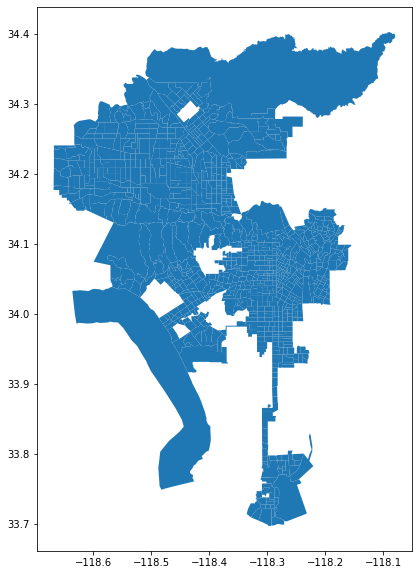

In [21]:
census_poverty.plot(figsize=(10,10))

## Charts and Maps


### Charts
Below are two charts of income in the past 12 months

- The first chart is showing income in the past 12 months that is from individuals living below the poverty line
- The second chart shows income in the past 12 months that is from individuals living above the poverty line

> I was curious to see the two data sets plotted.  



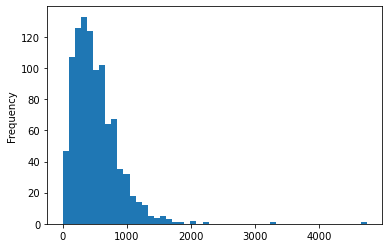

In [17]:
census_poverty['Income in the past 12 months below poverty level'].plot.hist(bins=50)

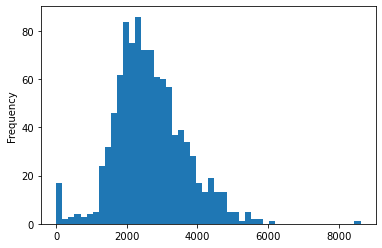

In [22]:
census_poverty['Income in the past 12 months at or above poverty level'].plot.hist(bins=50)

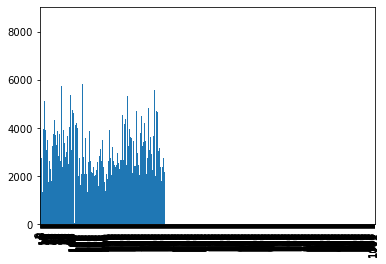

In [27]:
census_poverty['Income in the past 12 months at or above poverty level'].plot.bar(50)

In [24]:
census_poverty_sorted_below = census_poverty.sort_values(by='Income in the past 12 months below poverty level',ascending = False)

In [25]:
census_poverty_sorted_above = census_poverty.sort_values(by='Income in the past 12 months at or above poverty level',ascending = False)

### Subplot maps
- The first one shows the top 100 census tracts with income in the past 12 months below the poverty level
- The second one shows the top 100 census tracts with income in the past 12 months above the poverty level

> Although there is no base map, the subplot maps the income levels within each area. As a native to Los Angeles, I can already see LA's regions in the subplot maps. The first map highlights areas in South Los Angeles, while the second map highlights areas in North Los Angeles.

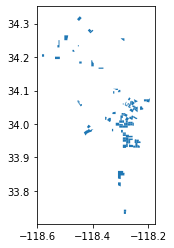

In [21]:
census_poverty_sorted_below.head(100).plot()

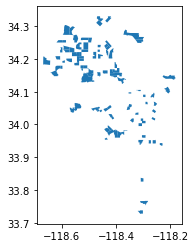

In [22]:
census_poverty_sorted_above.head(100).plot()

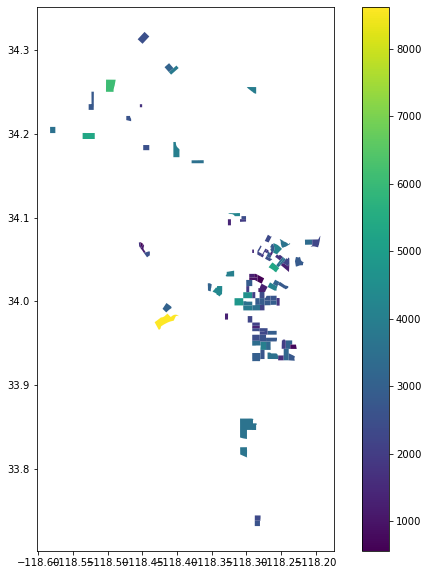

In [23]:
census_poverty_sorted_below.head(100).plot(figsize=(10,10),column='Income in the past 12 months at or above poverty level',legend=True)

In [24]:
import contextily as ctx

In [25]:
import matplotlib.pyplot as plt

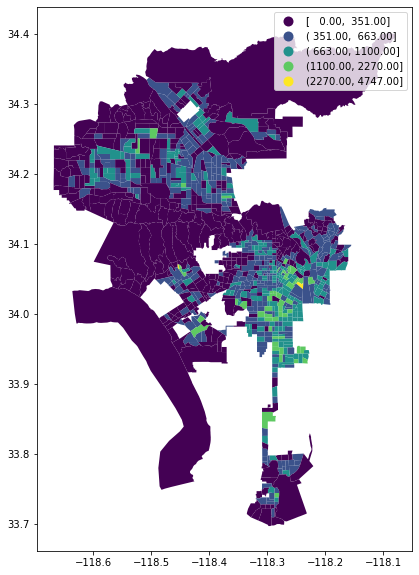

In [26]:
census_poverty.plot(figsize=(10,10),
                 column='Income in the past 12 months below poverty level',
                 legend=True, 
                 scheme='NaturalBreaks')

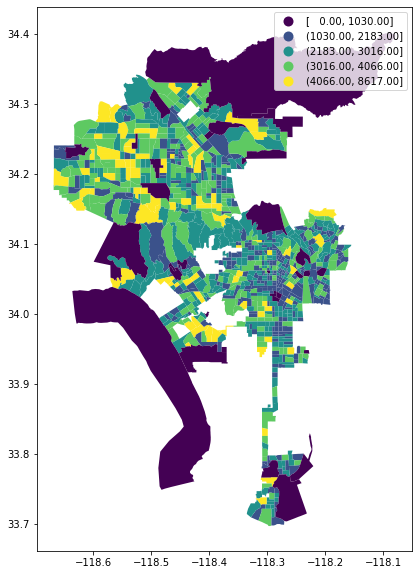

In [27]:
census_poverty.plot(figsize=(10,10),
                 column='Income in the past 12 months at or above poverty level',
                 legend=True, 
                 scheme='NaturalBreaks')

## Deeper dive of unemployment

>Here I wanted to see how different unemployment mapped out within men and women living below poverty. 


Althought it might look like women appear to have higher unemployment, when we look at the ledgend we see that men have higher rates of unemployment. The areas of unemployment for men and women look to be similar. 

Text(0.5, 1.0, 'Female Unemployed BPL')

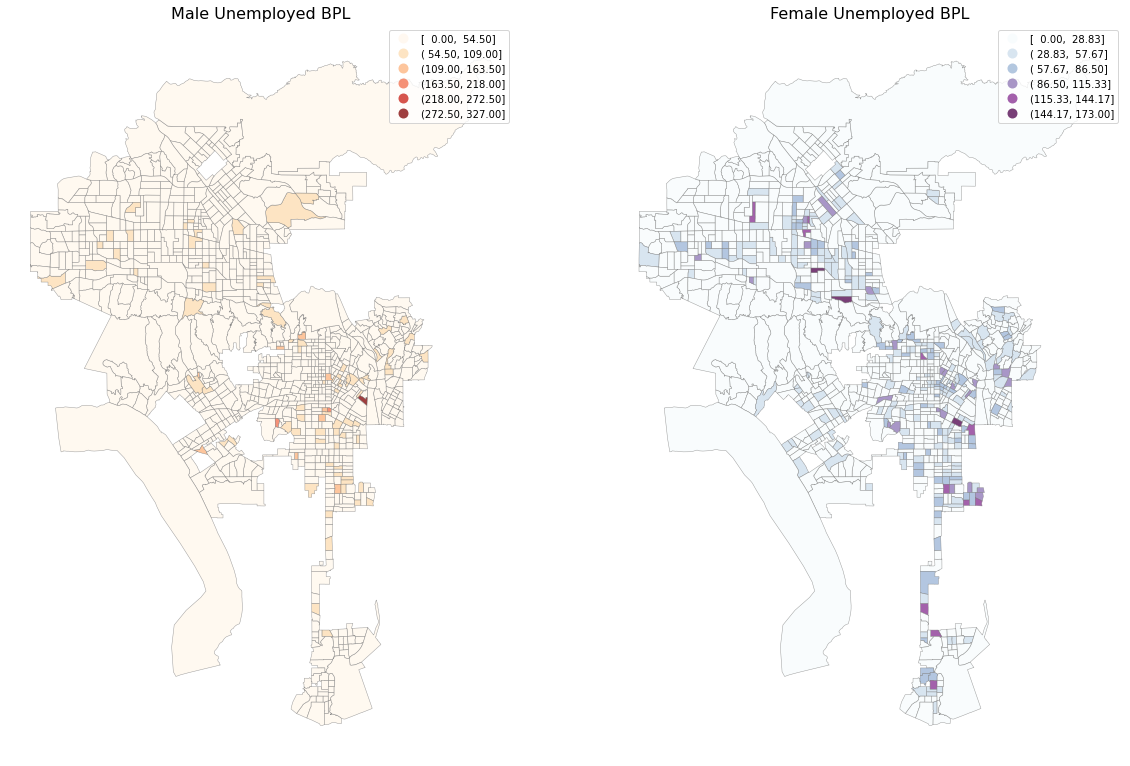

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

ax1, ax2 = axs

census_poverty.plot(column='Male Unemployed BPL', 
            cmap='OrRd', 
            scheme='equal_interval',
            k=6, 
            edgecolor='grey', 
            linewidth=0.5, 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title('Male Unemployed BPL' , fontsize = 16)

census_poverty.plot(column='Female Unemployed BPL', 
            cmap='BuPu', 
            scheme='equal_interval',
            k=6, 
            edgecolor='grey', 
            linewidth=0.5, 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title ('Female Unemployed BPL', fontsize=16)

In [56]:
census_poverty_web_mercator = census_poverty.to_crs(epsg=3857)

## Adding Base Maps
>In the following map uses a tone light base map. 
I wanted the map below to show the census tracts of individuals living below the poverty level whose income was higher than 30%. I really like this base map and the blue. This base map will be a go to in the future. 

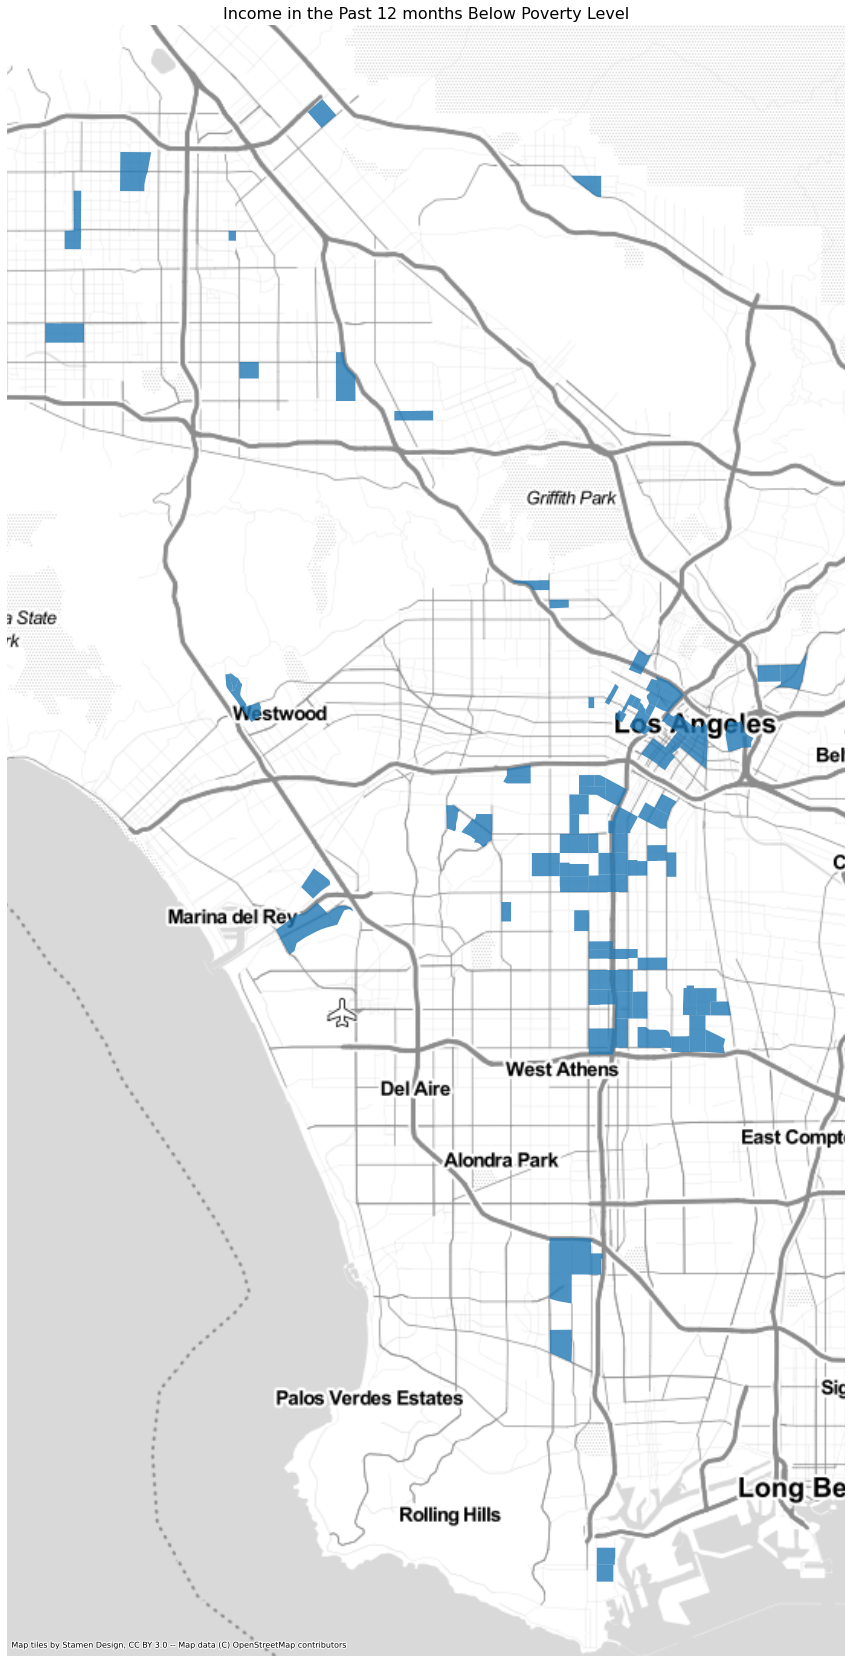

In [69]:
fig, ax = plt.subplots(figsize=(30, 30))

census_poverty_web_mercator[census_poverty_web_mercator['Income in the past 12 months below poverty level'] > 1000].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Income in the Past 12 months Below Poverty Level',fontsize=16)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)